In [1]:
import pandas as pd
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

In [2]:
df = pd.read_csv('~/dropbox/python숙달/data/depp/trees.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Girth   31 non-null     float64
 1   Height  31 non-null     int64  
 2   Volume  31 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 872.0 bytes


# Volume을 예측해 보세요. 정규화
- Girth 8.8, 10.5
- Height 63, 72

In [4]:
x = df.iloc[:, :-1]
y = df.iloc[:, -1:]

## 정규화

In [5]:
from sklearn.preprocessing import MinMaxScaler

In [6]:
x_pred = np.array([[8.8, 63], [10.5, 72]])

In [7]:
scaler1 = MinMaxScaler()
scaler1.fit(x)
x_scaled = scaler1.transform(x)
x_pred_scaled = scaler1.transform(x_pred)

In [8]:
pd.DataFrame(x_pred) 

,0,1
0,8.8,63.0
1,10.5,72.0


## tf version

In [9]:
x_data = tf.constant(x_scaled, tf.float32)
y_data = tf.constant(y, tf.float32)

In [10]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [11]:
def compute_loss():
    hx = tf.matmul(x_data, w) + b
    cost = tf.reduce_mean((hx - y_data) ** 2)
    return cost

In [12]:
optimizer = Adam(0.1)
patience = 100
pcnt = 0
hist_cost = []
min_delta = 0.001

for epoch in range(3000):
    optimizer.minimize(compute_loss, var_list = [w, b])
    cost = compute_loss().numpy()
    hist_cost.append( cost )
    print(epoch, "cost = ", cost)
    if epoch > 0:
        if hist_cost[epoch - 1] - hist_cost[epoch] > min_delta:
            pcnt = 0
        else:
            pcnt += 1
        if pcnt > patience:
            print("early stopping")
            break
        else:
            continue

0 cost =  1120.8446
1 cost =  1108.1842
2 cost =  1095.6068
3 cost =  1083.114
4 cost =  1070.7068
5 cost =  1058.3866
6 cost =  1046.1547
7 cost =  1034.0121
8 cost =  1021.9601
9 cost =  1009.99963
10 cost =  998.1319
11 cost =  986.35785
12 cost =  974.6784
13 cost =  963.0945
14 cost =  951.60693
15 cost =  940.21655
16 cost =  928.9239
17 cost =  917.72974
18 cost =  906.6346
19 cost =  895.63916
20 cost =  884.74384
21 cost =  873.9491
22 cost =  863.2552
23 cost =  852.66254
24 cost =  842.1714
25 cost =  831.7821
26 cost =  821.4945
27 cost =  811.309
28 cost =  801.22565
29 cost =  791.24426
30 cost =  781.365
31 cost =  771.58777
32 cost =  761.9123
33 cost =  752.3387
34 cost =  742.8667
35 cost =  733.496
36 cost =  724.2264
37 cost =  715.05756
38 cost =  705.9892
39 cost =  697.02106
40 cost =  688.1526
41 cost =  679.3836
42 cost =  670.7135
43 cost =  662.142
44 cost =  653.66846
45 cost =  645.2926
46 cost =  637.0136
47 cost =  628.83124
48 cost =  620.7448
49 cost = 

399 cost =  83.91476
400 cost =  83.8111
401 cost =  83.70749
402 cost =  83.60392
403 cost =  83.5004
404 cost =  83.396935
405 cost =  83.2935
406 cost =  83.19013
407 cost =  83.08678
408 cost =  82.98348
409 cost =  82.88024
410 cost =  82.77703
411 cost =  82.67386
412 cost =  82.57074
413 cost =  82.46764
414 cost =  82.36459
415 cost =  82.26159
416 cost =  82.158615
417 cost =  82.055695
418 cost =  81.952805
419 cost =  81.849945
420 cost =  81.74712
421 cost =  81.644356
422 cost =  81.54162
423 cost =  81.43892
424 cost =  81.33628
425 cost =  81.233635
426 cost =  81.13106
427 cost =  81.02851
428 cost =  80.92602
429 cost =  80.823524
430 cost =  80.7211
431 cost =  80.61869
432 cost =  80.51633
433 cost =  80.414
434 cost =  80.311714
435 cost =  80.209465
436 cost =  80.10726
437 cost =  80.00508
438 cost =  79.90295
439 cost =  79.80086
440 cost =  79.69878
441 cost =  79.596756
442 cost =  79.49479
443 cost =  79.39284
444 cost =  79.29093
445 cost =  79.18906
446 cost

819 cost =  46.141716
820 cost =  46.071148
821 cost =  46.000698
822 cost =  45.930344
823 cost =  45.86011
824 cost =  45.78996
825 cost =  45.719925
826 cost =  45.650005
827 cost =  45.580177
828 cost =  45.510464
829 cost =  45.44085
830 cost =  45.37135
831 cost =  45.30195
832 cost =  45.23267
833 cost =  45.163467
834 cost =  45.0944
835 cost =  45.025417
836 cost =  44.956554
837 cost =  44.887783
838 cost =  44.819115
839 cost =  44.75057
840 cost =  44.682125
841 cost =  44.613785
842 cost =  44.54555
843 cost =  44.47742
844 cost =  44.409397
845 cost =  44.341473
846 cost =  44.273674
847 cost =  44.20597
848 cost =  44.138374
849 cost =  44.070877
850 cost =  44.003498
851 cost =  43.936214
852 cost =  43.86904
853 cost =  43.80197
854 cost =  43.735
855 cost =  43.66814
856 cost =  43.60139
857 cost =  43.53474
858 cost =  43.46818
859 cost =  43.401752
860 cost =  43.335415
861 cost =  43.269184
862 cost =  43.203053
863 cost =  43.137047
864 cost =  43.07113
865 cost =

1240 cost =  25.187422
1241 cost =  25.156017
1242 cost =  25.124681
1243 cost =  25.093424
1244 cost =  25.062233
1245 cost =  25.03112
1246 cost =  25.000065
1247 cost =  24.969088
1248 cost =  24.938192
1249 cost =  24.907356
1250 cost =  24.87659
1251 cost =  24.845911
1252 cost =  24.81528
1253 cost =  24.784737
1254 cost =  24.754261
1255 cost =  24.723852
1256 cost =  24.693506
1257 cost =  24.66325
1258 cost =  24.633043
1259 cost =  24.602919
1260 cost =  24.572857
1261 cost =  24.542868
1262 cost =  24.512947
1263 cost =  24.483103
1264 cost =  24.453325
1265 cost =  24.423618
1266 cost =  24.393976
1267 cost =  24.3644
1268 cost =  24.3349
1269 cost =  24.305458
1270 cost =  24.276104
1271 cost =  24.246794
1272 cost =  24.217567
1273 cost =  24.188412
1274 cost =  24.15932
1275 cost =  24.130299
1276 cost =  24.10134
1277 cost =  24.072449
1278 cost =  24.043623
1279 cost =  24.014872
1280 cost =  23.98619
1281 cost =  23.957565
1282 cost =  23.929016
1283 cost =  23.90053


1665 cost =  16.914415
1666 cost =  16.90392
1667 cost =  16.89345
1668 cost =  16.883015
1669 cost =  16.872606
1670 cost =  16.862223
1671 cost =  16.851877
1672 cost =  16.841558
1673 cost =  16.831266
1674 cost =  16.821005
1675 cost =  16.810774
1676 cost =  16.800566
1677 cost =  16.79039
1678 cost =  16.780256
1679 cost =  16.770134
1680 cost =  16.760044
1681 cost =  16.749987
1682 cost =  16.739964
1683 cost =  16.72996
1684 cost =  16.719986
1685 cost =  16.71004
1686 cost =  16.700123
1687 cost =  16.690233
1688 cost =  16.680378
1689 cost =  16.670542
1690 cost =  16.660738
1691 cost =  16.65096
1692 cost =  16.641218
1693 cost =  16.63149
1694 cost =  16.621803
1695 cost =  16.612133
1696 cost =  16.602497
1697 cost =  16.592892
1698 cost =  16.58331
1699 cost =  16.573757
1700 cost =  16.564224
1701 cost =  16.554728
1702 cost =  16.545252
1703 cost =  16.535812
1704 cost =  16.526392
1705 cost =  16.517002
1706 cost =  16.507637
1707 cost =  16.498297
1708 cost =  16.488

2086 cost =  14.387569
2087 cost =  14.38468
2088 cost =  14.381806
2089 cost =  14.378932
2090 cost =  14.376069
2091 cost =  14.3732195
2092 cost =  14.370378
2093 cost =  14.367542
2094 cost =  14.364719
2095 cost =  14.361907
2096 cost =  14.359104
2097 cost =  14.356303
2098 cost =  14.353519
2099 cost =  14.350743
2100 cost =  14.347974
2101 cost =  14.345211
2102 cost =  14.342464
2103 cost =  14.339729
2104 cost =  14.336993
2105 cost =  14.33427
2106 cost =  14.331563
2107 cost =  14.328859
2108 cost =  14.32616
2109 cost =  14.323481
2110 cost =  14.320803
2111 cost =  14.318136
2112 cost =  14.3154745
2113 cost =  14.312823
2114 cost =  14.310185
2115 cost =  14.307546
2116 cost =  14.304923
2117 cost =  14.302312
2118 cost =  14.29971
2119 cost =  14.297113
2120 cost =  14.294522
2121 cost =  14.291943
2122 cost =  14.2893715
2123 cost =  14.286806
2124 cost =  14.284246
2125 cost =  14.281706
2126 cost =  14.279167
2127 cost =  14.276638
2128 cost =  14.274122
2129 cost = 

In [13]:
def hxfn(xdata):
    xdata = tf.constant(xdata, tf.float32)
    hx = tf.matmul(xdata, w) + b
    return hx.numpy()

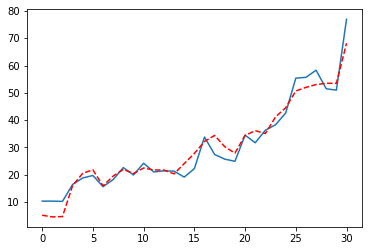

In [14]:
plt.plot( y)
plt.plot( hxfn( x_scaled) ,'r--')
plt.show()

In [15]:
df

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8
5,10.8,83,19.7
6,11.0,66,15.6
7,11.0,75,18.2
8,11.1,80,22.6
9,11.2,75,19.9


In [16]:
hxfn(x_pred_scaled)

array([[ 4.6243353],
       [15.998015 ]], dtype=float32)

## Keras version

In [17]:
w = tf.Variable(tf.random.uniform([2,1]))
b = tf.Variable(tf.random.uniform([1]))

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
dense = Dense( units = 1, input_dim = 2)
model = Sequential([dense])
model.compile(loss = 'mse', optimizer = Adam(0.1))
earlyStop = EarlyStopping(monitor = 'loss', min_delta = 0.01, patience = 100)
h = model.fit(x_data, y_data, epochs = 15000, callbacks = [earlyStop])

Epoch 1/15000
1/1 [==============================] - 0s 1000us/step - loss: 1097.6984
Epoch 2/15000
1/1 [==============================] - 0s 1ms/step - loss: 1085.1547
Epoch 3/15000
1/1 [==============================] - 0s 1ms/step - loss: 1072.6925
Epoch 4/15000
1/1 [==============================] - 0s 0s/step - loss: 1060.3134
Epoch 5/15000
1/1 [==============================] - 0s 1000us/step - loss: 1048.0188
Epoch 6/15000
1/1 [==============================] - 0s 1ms/step - loss: 1035.8097
Epoch 7/15000
1/1 [==============================] - 0s 0s/step - loss: 1023.6877
Epoch 8/15000
1/1 [==============================] - 0s 1ms/step - loss: 1011.6540
Epoch 9/15000
1/1 [==============================] - 0s 1ms/step - loss: 999.7096
Epoch 10/15000
1/1 [==============================] - 0s 1ms/step - loss: 987.8557
Epoch 11/15000
1/1 [==============================] - 0s 1ms/step - loss: 976.0935
Epoch 12/15000
1/1 [==============================] - 0s 1000us/step - loss: 964.424

1/1 [==============================] - 0s 1ms/step - loss: 311.1119
Epoch 100/15000
1/1 [==============================] - 0s 1ms/step - loss: 307.1442
Epoch 101/15000
1/1 [==============================] - 0s 1ms/step - loss: 303.2373
Epoch 102/15000
1/1 [==============================] - 0s 1000us/step - loss: 299.3905
Epoch 103/15000
1/1 [==============================] - 0s 0s/step - loss: 295.6031
Epoch 104/15000
1/1 [==============================] - 0s 998us/step - loss: 291.8744
Epoch 105/15000
1/1 [==============================] - 0s 1000us/step - loss: 288.2039
Epoch 106/15000
1/1 [==============================] - 0s 0s/step - loss: 284.5907
Epoch 107/15000
1/1 [==============================] - 0s 1ms/step - loss: 281.0343
Epoch 108/15000
1/1 [==============================] - 0s 0s/step - loss: 277.5339
Epoch 109/15000
1/1 [==============================] - 0s 999us/step - loss: 274.0890
Epoch 110/15000
1/1 [==============================] - 0s 0s/step - loss: 270.6989
Ep

1/1 [==============================] - 0s 1ms/step - loss: 121.9031
Epoch 197/15000
1/1 [==============================] - 0s 998us/step - loss: 121.2331
Epoch 198/15000
1/1 [==============================] - 0s 1000us/step - loss: 120.5766
Epoch 199/15000
1/1 [==============================] - 0s 0s/step - loss: 119.9334
Epoch 200/15000
1/1 [==============================] - 0s 1ms/step - loss: 119.3032
Epoch 201/15000
1/1 [==============================] - 0s 0s/step - loss: 118.6857
Epoch 202/15000
1/1 [==============================] - 0s 1000us/step - loss: 118.0807
Epoch 203/15000
1/1 [==============================] - 0s 997us/step - loss: 117.4879
Epoch 204/15000
1/1 [==============================] - 0s 1ms/step - loss: 116.9071
Epoch 205/15000
1/1 [==============================] - 0s 0s/step - loss: 116.3380
Epoch 206/15000
1/1 [==============================] - 0s 1000us/step - loss: 115.7803
Epoch 207/15000
1/1 [==============================] - 0s 999us/step - loss: 115.2

1/1 [==============================] - 0s 0s/step - loss: 91.9489
Epoch 294/15000
1/1 [==============================] - 0s 1ms/step - loss: 91.8136
Epoch 295/15000
1/1 [==============================] - 0s 999us/step - loss: 91.6795
Epoch 296/15000
1/1 [==============================] - 0s 0s/step - loss: 91.5466
Epoch 297/15000
1/1 [==============================] - 0s 1000us/step - loss: 91.4147
Epoch 298/15000
1/1 [==============================] - 0s 1ms/step - loss: 91.2840
Epoch 299/15000
1/1 [==============================] - 0s 0s/step - loss: 91.1542
Epoch 300/15000
1/1 [==============================] - 0s 0s/step - loss: 91.0255
Epoch 301/15000
1/1 [==============================] - 0s 0s/step - loss: 90.8977
Epoch 302/15000
1/1 [==============================] - 0s 1ms/step - loss: 90.7709
Epoch 303/15000
1/1 [==============================] - 0s 0s/step - loss: 90.6450
Epoch 304/15000
1/1 [==============================] - 0s 1ms/step - loss: 90.5200
Epoch 305/15000
1/1 [

1/1 [==============================] - 0s 1ms/step - loss: 81.2074
Epoch 392/15000
1/1 [==============================] - 0s 0s/step - loss: 81.1074
Epoch 393/15000
1/1 [==============================] - 0s 1000us/step - loss: 81.0074
Epoch 394/15000
1/1 [==============================] - 0s 0s/step - loss: 80.9075
Epoch 395/15000
1/1 [==============================] - 0s 1000us/step - loss: 80.8077
Epoch 396/15000
1/1 [==============================] - 0s 1000us/step - loss: 80.7079
Epoch 397/15000
1/1 [==============================] - 0s 1ms/step - loss: 80.6081
Epoch 398/15000
1/1 [==============================] - 0s 1ms/step - loss: 80.5084
Epoch 399/15000
1/1 [==============================] - 0s 999us/step - loss: 80.4088
Epoch 400/15000
1/1 [==============================] - 0s 0s/step - loss: 80.3092
Epoch 401/15000
1/1 [==============================] - 0s 1ms/step - loss: 80.2096
Epoch 402/15000
1/1 [==============================] - 0s 1ms/step - loss: 80.1101
Epoch 403/15

1/1 [==============================] - 0s 999us/step - loss: 71.5991
Epoch 490/15000
1/1 [==============================] - 0s 0s/step - loss: 71.5032
Epoch 491/15000
1/1 [==============================] - 0s 999us/step - loss: 71.4073
Epoch 492/15000
1/1 [==============================] - 0s 999us/step - loss: 71.3115
Epoch 493/15000
1/1 [==============================] - 0s 0s/step - loss: 71.2158
Epoch 494/15000
1/1 [==============================] - 0s 0s/step - loss: 71.1201
Epoch 495/15000
1/1 [==============================] - 0s 1ms/step - loss: 71.0244
Epoch 496/15000
1/1 [==============================] - 0s 999us/step - loss: 70.9288
Epoch 497/15000
1/1 [==============================] - 0s 1000us/step - loss: 70.8333
Epoch 498/15000
1/1 [==============================] - 0s 1ms/step - loss: 70.7378
Epoch 499/15000
1/1 [==============================] - 0s 1ms/step - loss: 70.6424
Epoch 500/15000
1/1 [==============================] - 0s 1000us/step - loss: 70.5470
Epoch 501

1/1 [==============================] - 0s 1ms/step - loss: 62.4955
Epoch 588/15000
1/1 [==============================] - 0s 0s/step - loss: 62.4061
Epoch 589/15000
1/1 [==============================] - 0s 0s/step - loss: 62.3169
Epoch 590/15000
1/1 [==============================] - 0s 0s/step - loss: 62.2277
Epoch 591/15000
1/1 [==============================] - 0s 998us/step - loss: 62.1385
Epoch 592/15000
1/1 [==============================] - 0s 0s/step - loss: 62.0495
Epoch 593/15000
1/1 [==============================] - 0s 998us/step - loss: 61.9606
Epoch 594/15000
1/1 [==============================] - 0s 0s/step - loss: 61.8717
Epoch 595/15000
1/1 [==============================] - 0s 0s/step - loss: 61.7829
Epoch 596/15000
1/1 [==============================] - 0s 0s/step - loss: 61.6942
Epoch 597/15000
1/1 [==============================] - 0s 1ms/step - loss: 61.6056
Epoch 598/15000
1/1 [==============================] - 0s 1ms/step - loss: 61.5170
Epoch 599/15000
1/1 [==

1/1 [==============================] - 0s 999us/step - loss: 54.1476
Epoch 686/15000
1/1 [==============================] - 0s 1ms/step - loss: 54.0669
Epoch 687/15000
1/1 [==============================] - 0s 999us/step - loss: 53.9864
Epoch 688/15000
1/1 [==============================] - 0s 999us/step - loss: 53.9059
Epoch 689/15000
1/1 [==============================] - 0s 1ms/step - loss: 53.8255
Epoch 690/15000
1/1 [==============================] - 0s 998us/step - loss: 53.7453
Epoch 691/15000
1/1 [==============================] - 0s 0s/step - loss: 53.6651
Epoch 692/15000
1/1 [==============================] - 0s 1ms/step - loss: 53.5850
Epoch 693/15000
1/1 [==============================] - 0s 998us/step - loss: 53.5050
Epoch 694/15000
1/1 [==============================] - 0s 1ms/step - loss: 53.4251
Epoch 695/15000
1/1 [==============================] - 0s 0s/step - loss: 53.3453
Epoch 696/15000
1/1 [==============================] - 0s 480us/step - loss: 53.2656
Epoch 697/

1/1 [==============================] - 0s 1ms/step - loss: 46.7121
Epoch 784/15000
1/1 [==============================] - 0s 1000us/step - loss: 46.6413
Epoch 785/15000
1/1 [==============================] - 0s 1000us/step - loss: 46.5705
Epoch 786/15000
1/1 [==============================] - 0s 1ms/step - loss: 46.4998
Epoch 787/15000
1/1 [==============================] - 0s 999us/step - loss: 46.4292
Epoch 788/15000
1/1 [==============================] - 0s 1ms/step - loss: 46.3588
Epoch 789/15000
1/1 [==============================] - 0s 1ms/step - loss: 46.2884
Epoch 790/15000
1/1 [==============================] - 0s 2ms/step - loss: 46.2181
Epoch 791/15000
1/1 [==============================] - 0s 999us/step - loss: 46.1480
Epoch 792/15000
1/1 [==============================] - 0s 998us/step - loss: 46.0779
Epoch 793/15000
1/1 [==============================] - 0s 1ms/step - loss: 46.0079
Epoch 794/15000
1/1 [==============================] - 0s 0s/step - loss: 45.9381
Epoch 795

1/1 [==============================] - 0s 1000us/step - loss: 40.2532
Epoch 882/15000
1/1 [==============================] - 0s 1ms/step - loss: 40.1923
Epoch 883/15000
1/1 [==============================] - 0s 0s/step - loss: 40.1316
Epoch 884/15000
1/1 [==============================] - 0s 1ms/step - loss: 40.0709
Epoch 885/15000
1/1 [==============================] - 0s 999us/step - loss: 40.0104
Epoch 886/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.9500
Epoch 887/15000
1/1 [==============================] - 0s 998us/step - loss: 39.8896
Epoch 888/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.8294
Epoch 889/15000
1/1 [==============================] - 0s 0s/step - loss: 39.7692
Epoch 890/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.7092
Epoch 891/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.6493
Epoch 892/15000
1/1 [==============================] - 0s 1ms/step - loss: 39.5895
Epoch 893/15000

1/1 [==============================] - 0s 1000us/step - loss: 34.7653
Epoch 980/15000
1/1 [==============================] - 0s 1ms/step - loss: 34.7141
Epoch 981/15000
1/1 [==============================] - 0s 999us/step - loss: 34.6631
Epoch 982/15000
1/1 [==============================] - 0s 999us/step - loss: 34.6121
Epoch 983/15000
1/1 [==============================] - 0s 999us/step - loss: 34.5612
Epoch 984/15000
1/1 [==============================] - 0s 1ms/step - loss: 34.5105
Epoch 985/15000
1/1 [==============================] - 0s 1ms/step - loss: 34.4598
Epoch 986/15000
1/1 [==============================] - 0s 1000us/step - loss: 34.4092
Epoch 987/15000
1/1 [==============================] - 0s 0s/step - loss: 34.3587
Epoch 988/15000
1/1 [==============================] - 0s 999us/step - loss: 34.3084
Epoch 989/15000
1/1 [==============================] - 0s 0s/step - loss: 34.2581
Epoch 990/15000
1/1 [==============================] - 0s 1ms/step - loss: 34.2079
Epoch 99

1/1 [==============================] - 0s 0s/step - loss: 30.2363
Epoch 1077/15000
1/1 [==============================] - 0s 1ms/step - loss: 30.1940
Epoch 1078/15000
1/1 [==============================] - 0s 0s/step - loss: 30.1518
Epoch 1079/15000
1/1 [==============================] - 0s 1000us/step - loss: 30.1097
Epoch 1080/15000
1/1 [==============================] - 0s 1ms/step - loss: 30.0677
Epoch 1081/15000
1/1 [==============================] - 0s 0s/step - loss: 30.0258
Epoch 1082/15000
1/1 [==============================] - 0s 0s/step - loss: 29.9839
Epoch 1083/15000
1/1 [==============================] - 0s 0s/step - loss: 29.9421
Epoch 1084/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.9005
Epoch 1085/15000
1/1 [==============================] - 0s 2ms/step - loss: 29.8589
Epoch 1086/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.8173
Epoch 1087/15000
1/1 [==============================] - 0s 1ms/step - loss: 29.7759
Epoch 1088/

1/1 [==============================] - 0s 0s/step - loss: 26.5227
Epoch 1174/15000
1/1 [==============================] - 0s 0s/step - loss: 26.4884
Epoch 1175/15000
1/1 [==============================] - 0s 1000us/step - loss: 26.4541
Epoch 1176/15000
1/1 [==============================] - 0s 998us/step - loss: 26.4198
Epoch 1177/15000
1/1 [==============================] - 0s 1ms/step - loss: 26.3857
Epoch 1178/15000
1/1 [==============================] - 0s 997us/step - loss: 26.3516
Epoch 1179/15000
1/1 [==============================] - 0s 998us/step - loss: 26.3176
Epoch 1180/15000
1/1 [==============================] - 0s 0s/step - loss: 26.2837
Epoch 1181/15000
1/1 [==============================] - 0s 1ms/step - loss: 26.2499
Epoch 1182/15000
1/1 [==============================] - 0s 0s/step - loss: 26.2161
Epoch 1183/15000
1/1 [==============================] - 0s 0s/step - loss: 26.1824
Epoch 1184/15000
1/1 [==============================] - 0s 1000us/step - loss: 26.1488
Ep

1/1 [==============================] - 0s 0s/step - loss: 23.5260
Epoch 1271/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.4985
Epoch 1272/15000
1/1 [==============================] - 0s 999us/step - loss: 23.4711
Epoch 1273/15000
1/1 [==============================] - 0s 992us/step - loss: 23.4437
Epoch 1274/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.4163
Epoch 1275/15000
1/1 [==============================] - 0s 0s/step - loss: 23.3891
Epoch 1276/15000
1/1 [==============================] - 0s 0s/step - loss: 23.3619
Epoch 1277/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.3348
Epoch 1278/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.3077
Epoch 1279/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.2807
Epoch 1280/15000
1/1 [==============================] - 0s 0s/step - loss: 23.2537
Epoch 1281/15000
1/1 [==============================] - 0s 1ms/step - loss: 23.2269
Epoch 128

1/1 [==============================] - 0s 1ms/step - loss: 21.1428
Epoch 1368/15000
1/1 [==============================] - 0s 1000us/step - loss: 21.1211
Epoch 1369/15000
1/1 [==============================] - 0s 1ms/step - loss: 21.0994
Epoch 1370/15000
1/1 [==============================] - 0s 1000us/step - loss: 21.0778
Epoch 1371/15000
1/1 [==============================] - 0s 1ms/step - loss: 21.0563
Epoch 1372/15000
1/1 [==============================] - 0s 0s/step - loss: 21.0347
Epoch 1373/15000
1/1 [==============================] - 0s 999us/step - loss: 21.0133
Epoch 1374/15000
1/1 [==============================] - 0s 999us/step - loss: 20.9919
Epoch 1375/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9705
Epoch 1376/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9492
Epoch 1377/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9280
Epoch 1378/15000
1/1 [==============================] - 0s 1ms/step - loss: 20.9068


1/1 [==============================] - 0s 0s/step - loss: 19.2726
Epoch 1465/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.2556
Epoch 1466/15000
1/1 [==============================] - 0s 0s/step - loss: 19.2387
Epoch 1467/15000
1/1 [==============================] - 0s 0s/step - loss: 19.2219
Epoch 1468/15000
1/1 [==============================] - 0s 0s/step - loss: 19.2051
Epoch 1469/15000
1/1 [==============================] - 0s 999us/step - loss: 19.1883
Epoch 1470/15000
1/1 [==============================] - 0s 1000us/step - loss: 19.1716
Epoch 1471/15000
1/1 [==============================] - 0s 1000us/step - loss: 19.1549
Epoch 1472/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.1383
Epoch 1473/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.1217
Epoch 1474/15000
1/1 [==============================] - 0s 0s/step - loss: 19.1051
Epoch 1475/15000
1/1 [==============================] - 0s 1ms/step - loss: 19.0886
Epoch 

Epoch 1561/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.8226
Epoch 1562/15000
1/1 [==============================] - 0s 0s/step - loss: 17.8095
Epoch 1563/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.7965
Epoch 1564/15000
1/1 [==============================] - 0s 1000us/step - loss: 17.7836
Epoch 1565/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7706
Epoch 1566/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7577
Epoch 1567/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.7448
Epoch 1568/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7320
Epoch 1569/15000
1/1 [==============================] - 0s 0s/step - loss: 17.7192
Epoch 1570/15000
1/1 [==============================] - 0s 1ms/step - loss: 17.7064
Epoch 1571/15000
1/1 [==============================] - 0s 997us/step - loss: 17.6937
Epoch 1572/15000
1/1 [==============================] - 0s 1000us/step - los

1/1 [==============================] - 0s 994us/step - loss: 16.7111
Epoch 1659/15000
1/1 [==============================] - 0s 997us/step - loss: 16.7012
Epoch 1660/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6913
Epoch 1661/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6814
Epoch 1662/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6715
Epoch 1663/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6617
Epoch 1664/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6519
Epoch 1665/15000
1/1 [==============================] - 0s 0s/step - loss: 16.6421
Epoch 1666/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6323
Epoch 1667/15000
1/1 [==============================] - 0s 999us/step - loss: 16.6226
Epoch 1668/15000
1/1 [==============================] - 0s 999us/step - loss: 16.6129
Epoch 1669/15000
1/1 [==============================] - 0s 1ms/step - loss: 16.6032
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 15.8682
Epoch 1756/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8607
Epoch 1757/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8532
Epoch 1758/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8458
Epoch 1759/15000
1/1 [==============================] - 0s 999us/step - loss: 15.8383
Epoch 1760/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8309
Epoch 1761/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8235
Epoch 1762/15000
1/1 [==============================] - 0s 998us/step - loss: 15.8162
Epoch 1763/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.8088
Epoch 1764/15000
1/1 [==============================] - 0s 0s/step - loss: 15.8015
Epoch 1765/15000
1/1 [==============================] - 0s 0s/step - loss: 15.7942
Epoch 1766/15000
1/1 [==============================] - 0s 0s/step - loss: 15.7869
Epoch 17

1/1 [==============================] - 0s 0s/step - loss: 15.2356
Epoch 1853/15000
1/1 [==============================] - 0s 999us/step - loss: 15.2300
Epoch 1854/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2244
Epoch 1855/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2189
Epoch 1856/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.2133
Epoch 1857/15000
1/1 [==============================] - 0s 999us/step - loss: 15.2078
Epoch 1858/15000
1/1 [==============================] - 0s 0s/step - loss: 15.2023
Epoch 1859/15000
1/1 [==============================] - 0s 0s/step - loss: 15.1968
Epoch 1860/15000
1/1 [==============================] - 0s 2ms/step - loss: 15.1913
Epoch 1861/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.1858
Epoch 1862/15000
1/1 [==============================] - 0s 0s/step - loss: 15.1804
Epoch 1863/15000
1/1 [==============================] - 0s 1ms/step - loss: 15.1750
Epoch 1864

1/1 [==============================] - 0s 0s/step - loss: 14.7659
Epoch 1950/15000
1/1 [==============================] - 0s 998us/step - loss: 14.7617
Epoch 1951/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7576
Epoch 1952/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7535
Epoch 1953/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7494
Epoch 1954/15000
1/1 [==============================] - 0s 999us/step - loss: 14.7453
Epoch 1955/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.7412
Epoch 1956/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7372
Epoch 1957/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7331
Epoch 1958/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7291
Epoch 1959/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.7251
Epoch 1960/15000
1/1 [==============================] - 0s 0s/step - loss: 14.7211
Epoch 1

1/1 [==============================] - 0s 0s/step - loss: 14.4209
Epoch 2047/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4178
Epoch 2048/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.4149
Epoch 2049/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4118
Epoch 2050/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4089
Epoch 2051/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.4059
Epoch 2052/15000
1/1 [==============================] - 0s 1000us/step - loss: 14.4029
Epoch 2053/15000
1/1 [==============================] - 0s 0s/step - loss: 14.4000
Epoch 2054/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.3970
Epoch 2055/15000
1/1 [==============================] - 0s 999us/step - loss: 14.3941
Epoch 2056/15000
1/1 [==============================] - 0s 999us/step - loss: 14.3911
Epoch 2057/15000
1/1 [==============================] - 0s 0s/step - loss: 14.3882
Ep

1/1 [==============================] - 0s 0s/step - loss: 14.1706
Epoch 2144/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1684
Epoch 2145/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1662
Epoch 2146/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1641
Epoch 2147/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1619
Epoch 2148/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1598
Epoch 2149/15000
1/1 [==============================] - 0s 999us/step - loss: 14.1576
Epoch 2150/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1555
Epoch 2151/15000
1/1 [==============================] - 0s 1ms/step - loss: 14.1534
Epoch 2152/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1513
Epoch 2153/15000
1/1 [==============================] - 0s 2ms/step - loss: 14.1491
Epoch 2154/15000
1/1 [==============================] - 0s 0s/step - loss: 14.1470
Epoch 2155/

1/1 [==============================] - 0s 1ms/step - loss: 13.9914
Epoch 2241/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.9898
Epoch 2242/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.9883
Epoch 2243/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.9867
Epoch 2244/15000
1/1 [==============================] - 0s 0s/step - loss: 13.9852
Epoch 2245/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.9837
Epoch 2246/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.9822
Epoch 2247/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.9806
Epoch 2248/15000
1/1 [==============================] - 0s 999us/step - loss: 13.9791
Epoch 2249/15000
1/1 [==============================] - 0s 0s/step - loss: 13.9776
Epoch 2250/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.9761
Epoch 2251/15000
1/1 [==============================] - 0s 0s/step - loss: 13.9747
Epoc

1/1 [==============================] - 0s 0s/step - loss: 13.8649
Epoch 2338/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8638
Epoch 2339/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8628
Epoch 2340/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8617
Epoch 2341/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8606
Epoch 2342/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8596
Epoch 2343/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8585
Epoch 2344/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8574
Epoch 2345/15000
1/1 [==============================] - 0s 998us/step - loss: 13.8564
Epoch 2346/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8553
Epoch 2347/15000
1/1 [==============================] - 0s 0s/step - loss: 13.8543
Epoch 2348/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.8533
Epoch 2349/1

1/1 [==============================] - 0s 0s/step - loss: 13.7772
Epoch 2435/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7765
Epoch 2436/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7757
Epoch 2437/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7750
Epoch 2438/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7743
Epoch 2439/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7735
Epoch 2440/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7728
Epoch 2441/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7721
Epoch 2442/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7714
Epoch 2443/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7706
Epoch 2444/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.7699
Epoch 2445/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7692
Epoch 

1/1 [==============================] - 0s 1000us/step - loss: 13.7175
Epoch 2532/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.7170
Epoch 2533/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7165
Epoch 2534/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7160
Epoch 2535/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7155
Epoch 2536/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7150
Epoch 2537/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7145
Epoch 2538/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7140
Epoch 2539/15000
1/1 [==============================] - 0s 996us/step - loss: 13.7135
Epoch 2540/15000
1/1 [==============================] - 0s 999us/step - loss: 13.7131
Epoch 2541/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7126
Epoch 2542/15000
1/1 [==============================] - 0s 0s/step - loss: 13.7121
Epoc

1/1 [==============================] - 0s 999us/step - loss: 13.6776
Epoch 2629/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6773
Epoch 2630/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6769
Epoch 2631/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6766
Epoch 2632/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6763
Epoch 2633/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6760
Epoch 2634/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6756
Epoch 2635/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6753
Epoch 2636/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6750
Epoch 2637/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6747
Epoch 2638/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6744
Epoch 2639/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6741


1/1 [==============================] - 0s 1ms/step - loss: 13.6516
Epoch 2726/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6514
Epoch 2727/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6512
Epoch 2728/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6509
Epoch 2729/15000
1/1 [==============================] - 0s 998us/step - loss: 13.6507
Epoch 2730/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6505
Epoch 2731/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6503
Epoch 2732/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6501
Epoch 2733/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6499
Epoch 2734/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6497
Epoch 2735/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6495
Epoch 2736/15000
1/1 [==============================] - 0s 997us/step - loss: 13.649

1/1 [==============================] - 0s 998us/step - loss: 13.6350
Epoch 2823/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6349
Epoch 2824/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6347
Epoch 2825/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6346
Epoch 2826/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6345
Epoch 2827/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6343
Epoch 2828/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6342
Epoch 2829/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6341
Epoch 2830/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6339
Epoch 2831/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6338
Epoch 2832/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6337
Epoch 2833/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6335
Epoch 2834/15

1/1 [==============================] - 0s 0s/step - loss: 13.6247
Epoch 2920/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6246
Epoch 2921/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6245
Epoch 2922/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6244
Epoch 2923/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6244
Epoch 2924/15000
1/1 [==============================] - 0s 999us/step - loss: 13.6243
Epoch 2925/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6242
Epoch 2926/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6241
Epoch 2927/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6240
Epoch 2928/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6240
Epoch 2929/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6239
Epoch 2930/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6238
E

1/1 [==============================] - 0s 1000us/step - loss: 13.6185
Epoch 3017/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6184
Epoch 3018/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6184
Epoch 3019/15000
1/1 [==============================] - 0s 1000us/step - loss: 13.6183
Epoch 3020/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6183
Epoch 3021/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6182
Epoch 3022/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6182
Epoch 3023/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6181
Epoch 3024/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6181
Epoch 3025/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6180
Epoch 3026/15000
1/1 [==============================] - 0s 0s/step - loss: 13.6180
Epoch 3027/15000
1/1 [==============================] - 0s 1ms/step - loss: 13.6179
Epoch 302

In [20]:
w, b = model.get_weights()

In [21]:
w, b

(array([[57.565613],
        [ 8.483336]], dtype=float32),
 array([2.4146833], dtype=float32))

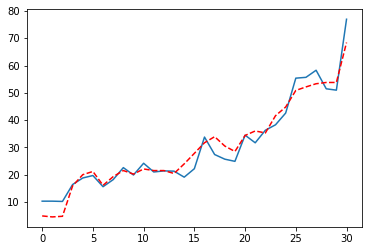

In [22]:
plt.plot( y_data)
plt.plot( model.predict(x_data) ,'r--')
plt.show()

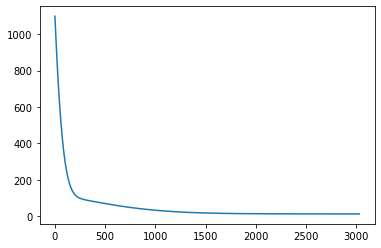

In [23]:
plt.plot(h.history['loss'])

In [24]:
x_pred

array([[ 8.8, 63. ],
       [10.5, 72. ]])

In [25]:
x_pred_scaled

array([[0.04065041, 0.        ],
       [0.17886179, 0.375     ]])

In [26]:
model.predict(x_pred_scaled)

array([[ 4.754749],
       [15.892222]], dtype=float32)

# 2. 구간 나누기
- volume이 40 이상이면 크다
- 30이상이면 보통 미만이면 적음으로
- 아래와 같이 출력하시요
- volume  정도

In [27]:
df['정도'] = pd.cut(x= df.Volume, bins = [0, 30, 40, 80], labels = ["적음", "보통", "크다"])

In [28]:
df

,Girth,Height,Volume,정도
0,8.3,70,10.3,적음
1,8.6,65,10.3,적음
2,8.8,63,10.2,적음
3,10.5,72,16.4,적음
4,10.7,81,18.8,적음
5,10.8,83,19.7,적음
6,11.0,66,15.6,적음
7,11.0,75,18.2,적음
8,11.1,80,22.6,적음
9,11.2,75,19.9,적음


# Height  가 가장 작은값과 큰값을 구하시요

In [29]:
df.nlargest(1, 'Height'), df.nsmallest(1, 'Height'), 

(    Girth  Height  Volume  정도
 30   20.6      87    77.0  크다,
    Girth  Height  Volume  정도
 2    8.8      63    10.2  적음)

# girth(테두리) 가 가장큰 top5를 출력하세요(girth, height, volume)

In [30]:
df.nlargest(5, 'Girth')[['Girth', 'Height', 'Volume']]

,Girth,Height,Volume
30,20.6,87,77.0
28,18.0,80,51.5
29,18.0,80,51.0
27,17.9,80,58.3
26,17.5,82,55.7
